In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [111]:
df1 = pd.read_csv("../100_data/102_processed/real_training_data.csv")
df2 = pd.read_csv("../100_data/102_processed/real_testing_data.csv")
df_list = [df1, df2]
df = pd.concat(df_list)
df.sample(10)

,Unnamed: 0,Date,Tweet_Content,Manual_Training_Labels,Manual_Testing_Labels
72,72,2023-02-24,Improving #AirQuality is vital to operations a...,NEUTRAL,NaN
31,31,2023-01-29,UK firm develops vans which can charge electri...,NaN,NEUTRAL
135,135,2021-06-01,... the transition to zero emission vehicles o...,NEUTRAL,NaN
97,97,2022-06-11,People can’t afford these gas prices and they ...,NaN,NEGATIVE
5,5,2020-01-27,GM plans massive plant to build electric vehic...,NEUTRAL,NaN
82,82,2023-06-20,Robert Downey Jr. turns his classic cars into ...,NEUTRAL,NaN
142,142,2021-09-08,This is unreal. Biden and the White House shun...,NEUTRAL,NaN
162,162,2022-06-11,I want an electric vehicle!,POSITIVE,NaN
49,49,2023-07-28,A year ago Rob DeSantis loved Electric Vehicle...,NaN,NEUTRAL
87,87,2022-05-22,"Ahhh, electric vehicles… what a beautiful futu...",NaN,POSITIVE


In [ ]:
# df_filtered = df.loc[
#     ~(df["Manual_Training_Labels"].isna())
# ]
# df_filtered
df["Manual_Training_Labels"] = df["Manual_Training_Labels"].str.strip()
df.loc[df["Manual_Training_Labels"] == "NEGTIVE", ["Manual_Training_Labels"]] = (
    "NEGATIVE"
)

False    303
Name: count, dtype: int64

In [115]:
pivoted = df.pivot(
    index=["Unnamed: 0", "Date"],
    columns="Manual_Training_Labels",
    values="Tweet_Content",
)
# pivoted["Date_time"] = pivoted.index
pivoted["date"] = pivoted.index.get_level_values(1)
pivoted["date_time"] = pd.to_datetime(pivoted["date"])
pivoted["year"] = pivoted["date_time"].dt.year
pivoted["month"] = pivoted["date_time"].dt.month
pivoted["half"] = [1 if x < 7 else 2 for x in pivoted["month"]]
pivoted = pivoted.groupby(["year", "month"]).count()
# pivoted = pivoted.groupby(["year", "half"]).count()
pivoted["Bi_Year"] = (
    pivoted.index.get_level_values(1).astype(str)
    + "-"
    + pivoted.index.get_level_values(0).astype(str)
)
pivoted

Manual_Training_Labels  NaN  NEGATIVE  NEUTRAL  POSITIVE  date  date_time  \
year month                                                                  
2020 1                    0         1        4         1     6          6   
     2                    3         1        4         2    10         10   
     3                    3         0        3         2     8          8   
     4                    3         0        3         1     7          7   
     5                    4         0        2         1     7          7   
     6                    3         0        5         3    11         11   
     7                    7         0        2         2    11         11   
     8                    1         0        8         2    11         11   
     9                    2         0        3         0     5          5   
2021 1                   10         2        3         9    24         24   
     2                    0         2        0         0     2          2   
     3                    4         0        2         1     7          7   
     4                    0         3        0         0     3          3   
     5                    1         1        0         0     2          2   
     6                    1         1        7         2    11         11   
     7                    4         0        1         0     5          5   
     8                    2         0        1         0     3          3   
     9                    2         1        3         1     7          7   
     10                   2         0        7         3    12         12   
2022 1                    8         7        3         9    27         27   
     2                    1         0        0         0     1          1   
     5                    5         1        4         0    10         10   
     6                   10        10        1         8    29         29   
     9                    0         0        0         2     2          2   
     10                   1         1        0         4     6          6   
2023 1                    6         4        9         1    20         20   
     2                    5         0       10         0    15         15   
     3                    2         0        1         0     3          3   
     6                    6         1       11         2    20         20   
     7                    7         1        2         4    14         14   
     8                    0         0        2         2     4          4   

Manual_Training_Labels  half  Bi_Year  
year month                             
2020 1                     6   1-2020  
     2                    10   2-2020  
     3                     8   3-2020  
     4                     7   4-2020  
     5                     7   5-2020  
     6                    11   6-2020  
     7                    11   7-2020  
     8                    11   8-2020  
     9                     5   9-2020  
2021 1                    24   1-2021  
     2                     2   2-2021  
     3                     7   3-2021  
     4                     3   4-2021  
     5                     2   5-2021  
     6                    11   6-2021  
     7                     5   7-2021  
     8                     3   8-2021  
     9                     7   9-2021  
     10                   12  10-2021  
2022 1                    27   1-2022  
     2                     1   2-2022  
     5                    10   5-2022  
     6                    29   6-2022  
     9                     2   9-2022  
     10                    6  10-2022  
2023 1                    20   1-2023  
     2                    15   2-2023  
     3                     3   3-2023  
     6                    20   6-2023  
     7                    14   7-2023  
     8                     4   8-2023

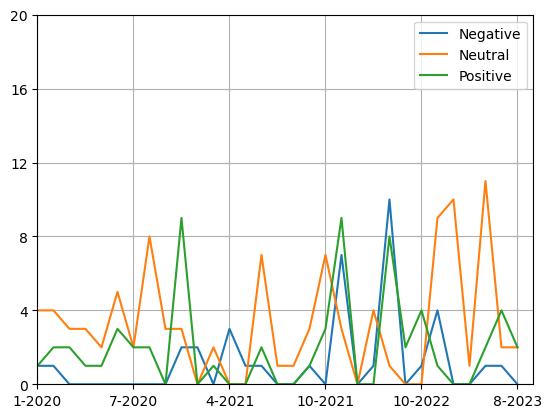

In [117]:
fig, ax = plt.subplots()
# Calculate the best-fit line
x = pivoted["Bi_Year"]
y = pivoted["NEGATIVE"]
y1 = pivoted["NEUTRAL"]
y2 = pivoted["POSITIVE"]


(line1,) = ax.plot(x, y, label="Negative")
(line2,) = ax.plot(x, y1, label="Neutral")
(line3,) = ax.plot(x, y2, label="Positive")
ax.legend(handles=[line1, line2, line3])
# ax.title("EV Sentiment Over Time")
# Plot the scatter plot and the trend line
# plt.plot(x, y)
# plt.plot(x, y1)
# plt.plot(x, y2)  # 'r--' is for a red dashed line
ax.set(
    xlim=(0, 31), xticks=np.arange(0, 31, 6), ylim=(0, 20), yticks=np.arange(0, 24, 4)
)
plt.grid(True)
plt.show()